In [1]:
import sys
sys.path.append("/content/drive/MyDrive/WorkSpace/AI_Research/Emotion/code/libs/")

import matplotlib.pyplot as plt
# from lr_finder import LRFinder
import data_processing
import get_models
import data_generator
import data_augmentation
import pandas as pd

import numpy as np
import keras
import tensorflow as tf
from keras import layers, Input
from keras.utils import np_utils 

from tensorflow.keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation,Average
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, ResNet50V2, MobileNetV2, MobileNetV2
from tensorflow.keras.optimizers import Adam, Adamax
from keras.models import load_model, Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import  image_dataset_from_directory


# Some Plot on Fer2013

In [2]:
emotionsfer = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotionsfer_plus = {0: 'Neutral', 1: 'Happiness', 2: 'Surprise', 3: 'Sadness', 4: 'Anger', 5: 'Disgust', 6: 'Fear'}
emotionsraf = {0: "Surprise", 1: "Fear",2: "Disgust",3: "Happiness",4: "Sadness",5: "Anger",6: "Neutral"}

In [3]:
# Get data
PATH_FER = "/content/drive/MyDrive/WorkSpace/AI_Research/datasets/Fer/icml_face_data.csv"
data = pd.read_csv(PATH_FER)

In [4]:
X_train,y_train, X_val, y_val, X_test, y_test = data_processing.load_fer(data)

In [5]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)


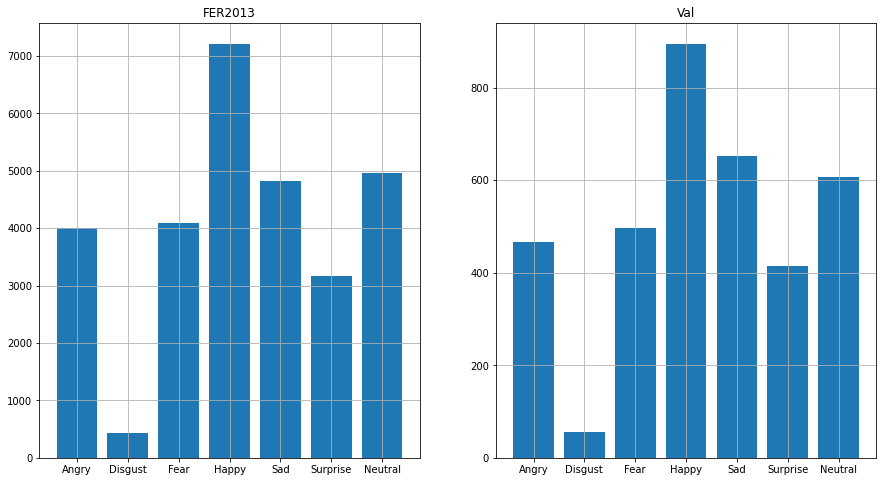

In [6]:
data_processing.plot_compare_distributions(Y_train, Y_test, emotionsfer, title1="FER2013", title2="Val")

In [7]:
X, y = data_processing.get_fer(data)
X = np.array(X)
X = X.reshape((X.shape[0], 48, 48, 1))

In [8]:
# Offline augmentation
datagen_5 = data_augmentation.keras_augmentation(X, y, num_class=1)

X_train,y_train, X_val, y_val, X_test, y_test = data_processing.load_fer(data)
# datagen_6 = data_augmentation.keras_augmentation(X, y, num_class=6)

X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 1, number_aug = 5)
# X, y = data_augmentation.offline_augment(X, y, datagen_6, num = 6)


In [9]:
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)

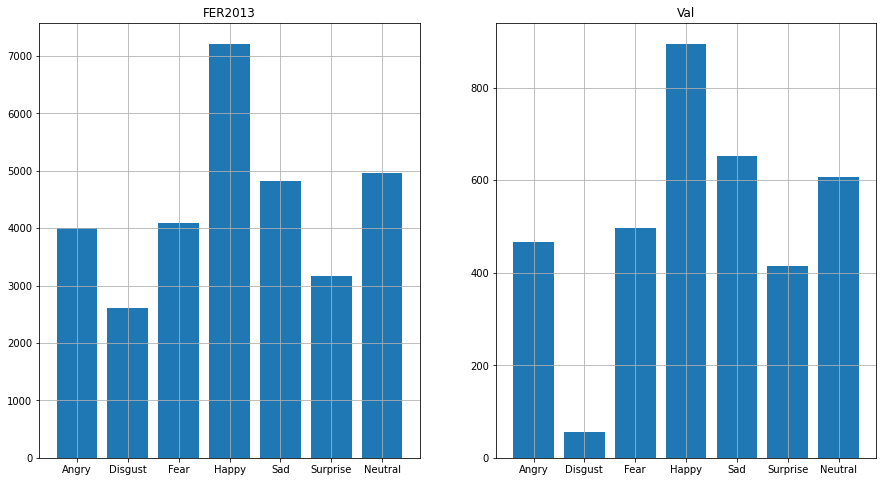

In [10]:
data_processing.plot_compare_distributions(Y_train, Y_test,emotionsfer, title1="FER2013", title2="Val")

# Some Plot on FerPlus


In [11]:
# Get data
X , y = data_processing.get_ferpus()
X, y = data_processing.ferplus_processing(X,y)
y_new = data_processing.majority_vote(y)
X_train,y_train, X_test, y_test = data_processing.split_data(X,y_new)
X_train, y_train, X_val, y_val= data_processing.split_data(X_train,y_train)

In [12]:
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)

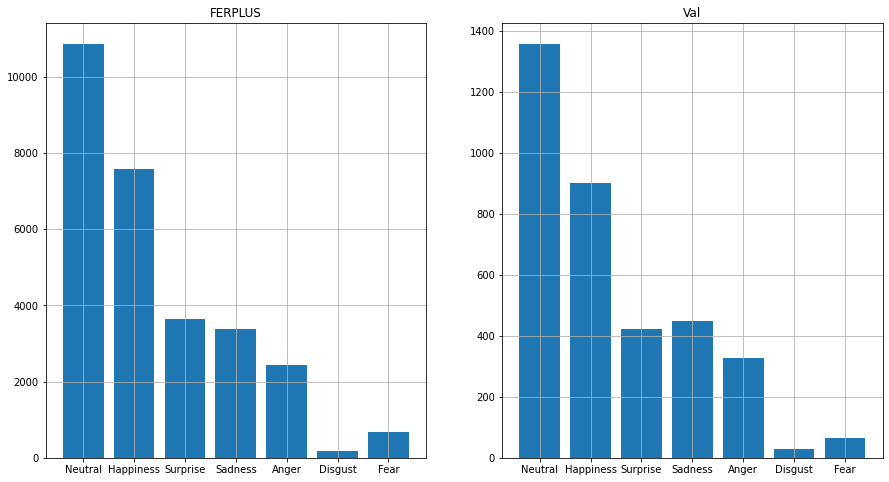

In [13]:
data_processing.plot_compare_distributions(Y_train, Y_test,emotionsfer_plus, title1="FERPLUS", title2="Val")

In [14]:
# Offline augmentation
X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 5, number_aug = 8)
X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 6, number_aug = 3)

#Split Data Train and Val
# X_train, y_val, X_val, y_val= data_processing.split_data(X_train,y_train)

In [15]:
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)

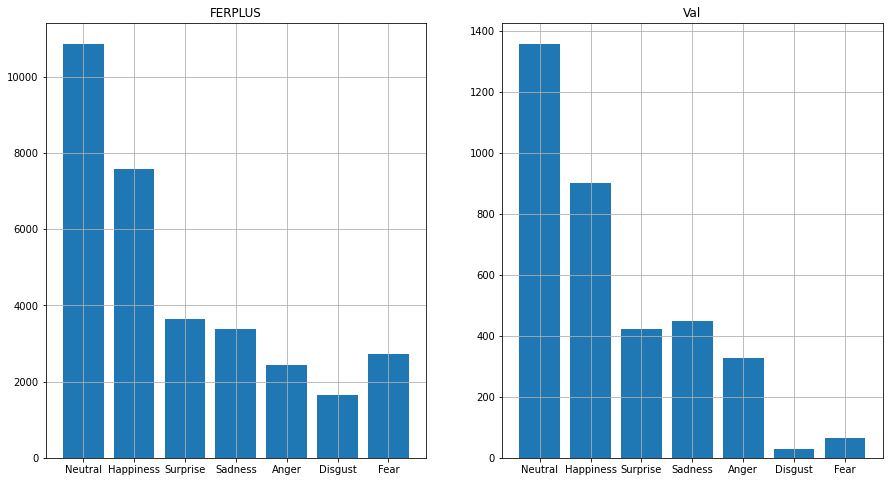

In [16]:
data_processing.plot_compare_distributions(Y_train, Y_test,emotionsfer_plus, title1="FERPLUS", title2="Val")

##RAF DB

In [17]:
X_train = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_images.npy")
y_train = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_labels.npy")
X_test = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_images1.npy")
y_test = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_labels.npy")
X_train, y_train, X_val, y_val= data_processing.split_data(X_train,y_train)

In [18]:
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)

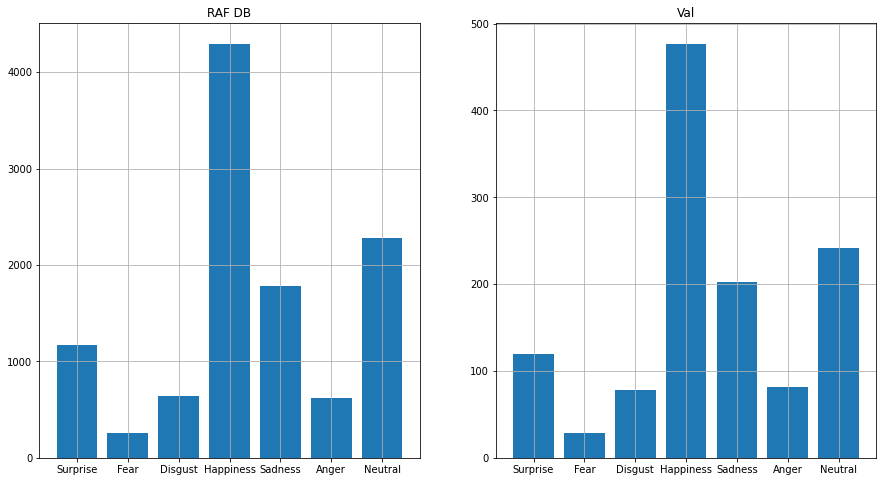

In [19]:
data_processing.plot_compare_distributions(Y_train, Y_val,emotionsraf, title1="RAF DB", title2="Val")

In [20]:
X_train = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_images.npy")
y_train = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_labels.npy")
X_test = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_images1.npy")
y_test = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_labels.npy")

In [21]:
# Offline augmentation
# X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 5, number_aug = 8)
X_train, y_train, X_val, y_val= data_processing.split_data(X_train,y_train)
X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 1, number_aug = 7)
X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 2, number_aug = 2)
X_train, y_train = data_augmentation.aug_offline(X_train, y_train, num_class = 5, number_aug = 2)
#Split Data Train and Val


In [22]:
Y_train = np_utils.to_categorical(y_train, 7)
Y_val = np_utils.to_categorical(y_val, 7)
Y_test = np_utils.to_categorical(y_test, 7)

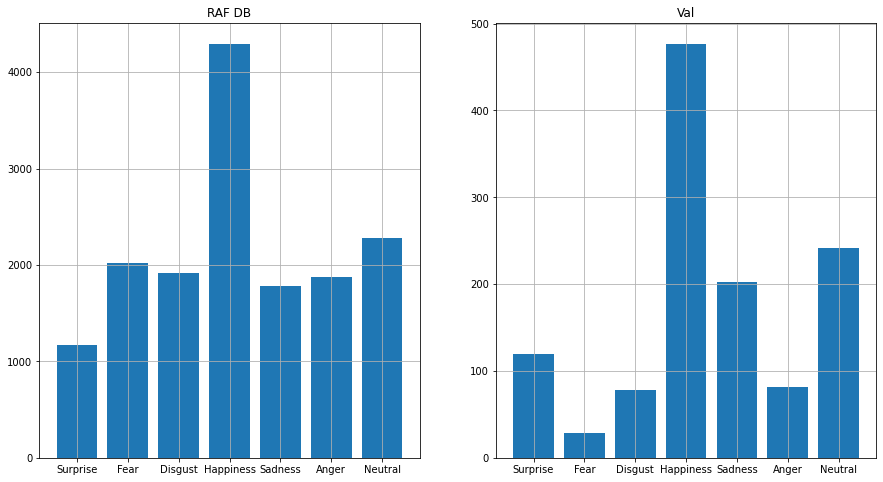

In [23]:
data_processing.plot_compare_distributions(Y_train, Y_val,emotionsraf, title1="RAF DB", title2="Val")